In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("heart.csv")
df.head()


['demo.ipynb', 'heart.csv', 'heartDiseaseAndAges.png', 'heartpre', 'prediction.py']


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
df.shape

(303, 14)

In [65]:
# these all are the categorical variables

print(df["target"].unique()) # the prediction parameter
print(df["thal"].unique())
print(df["slope"].unique())
print(df["exang"].unique())
print(df["restecg"].unique())
print(df["ca"].unique())
print(df["fbs"].unique())


[1 0]
[1 2 3 0]
[0 2 1]
[0 1]
[0 1 2]
[0 2 1 3 4]
[1 0]


In [66]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [67]:
# check missing or null values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [69]:
# some important things to be mentioned are:-
# age: The person's age in years

# sex: The person's sex (1 = male, 0 = female)

# cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

# trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

# chol: The person's cholesterol measurement in mg/dl

# fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

# restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

# thalach: The person's maximum heart rate achieved

# exang: Exercise induced angina (1 = yes; 0 = no)


# oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

# ca: The number of major vessels (0-3)

# thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

# target: Heart disease (0 = no, 1 = yes)
# Heart disease risk factors to the following: high cholesterol, high blood pressure, diabetes, weight, family history and smoking .

# According to another source , the major factors that can't be changed are: increasing age, male gender and heredity.

# Note that thalassemia, one of the variables in this dataset, is heredity.

# Major factors that can be modified are: Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes.

# Other factors include stress, alcohol and poor diet/nutrition.

1    165
0    138
Name: target, dtype: int64

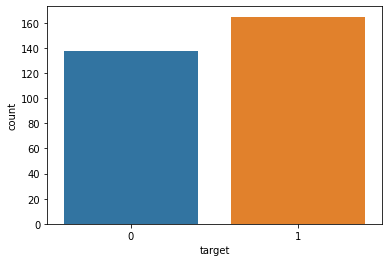

In [70]:
sns.countplot(df['target'])
df.target.value_counts()

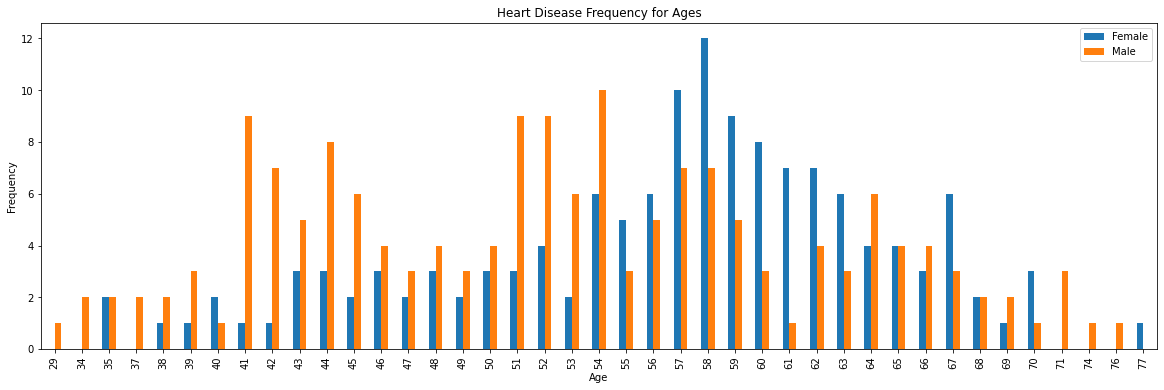

In [71]:

pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(["Female","Male"])
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<module 'matplotlib.pyplot' from 'c:\\Users\\divya\\OneDrive\\Desktop\\Ai project\\heartpre\\lib\\site-packages\\matplotlib\\pyplot.py'>


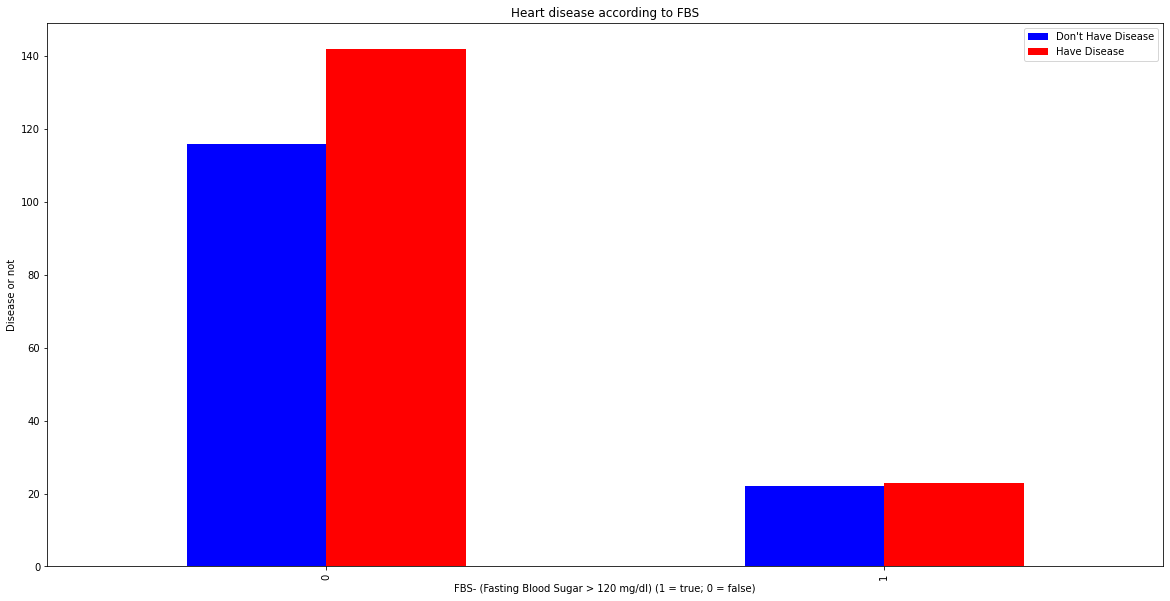

In [73]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(20,10),color=['blue','red'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
print(plt)

In [74]:
plt.figure(figsize=(26, 15))
sns.barplot(df["restecg"],y)

NameError: name 'y' is not defined

<AxesSubplot:xlabel='trestbps', ylabel='target'>

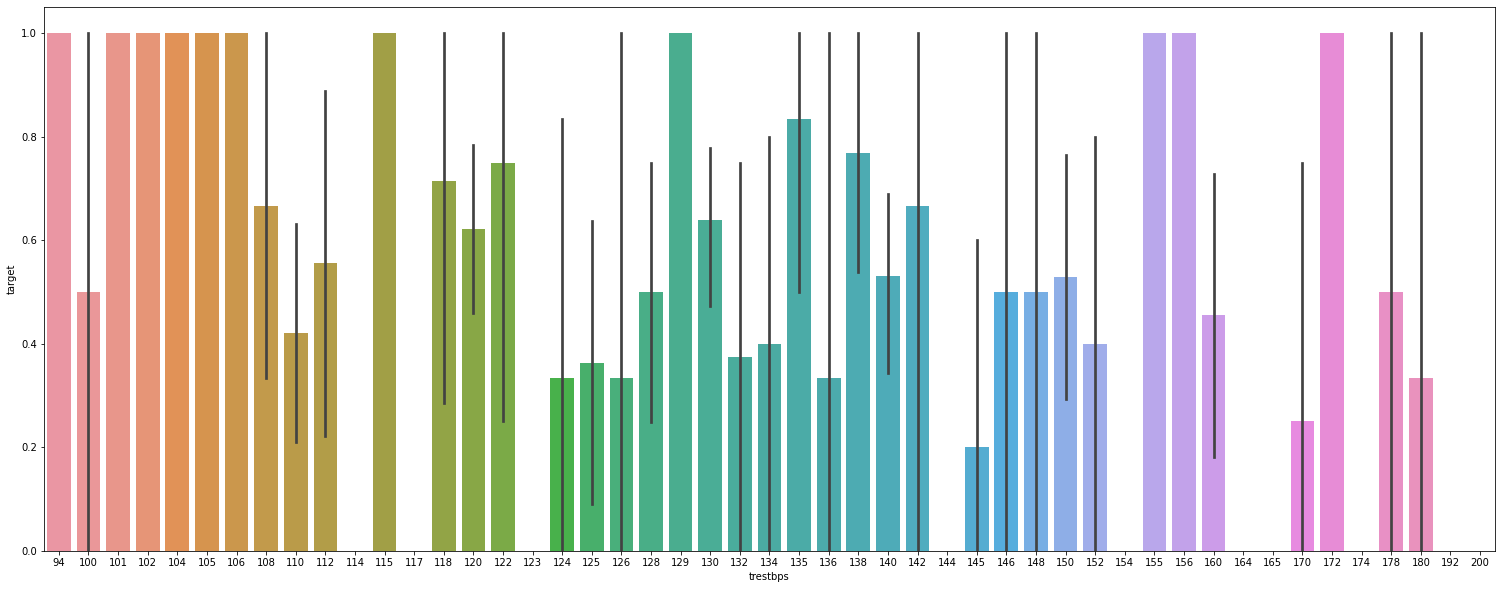

In [20]:
plt.figure(figsize=(26, 10))
sns.barplot(df["trestbps"],y)

<AxesSubplot:xlabel='exang', ylabel='target'>

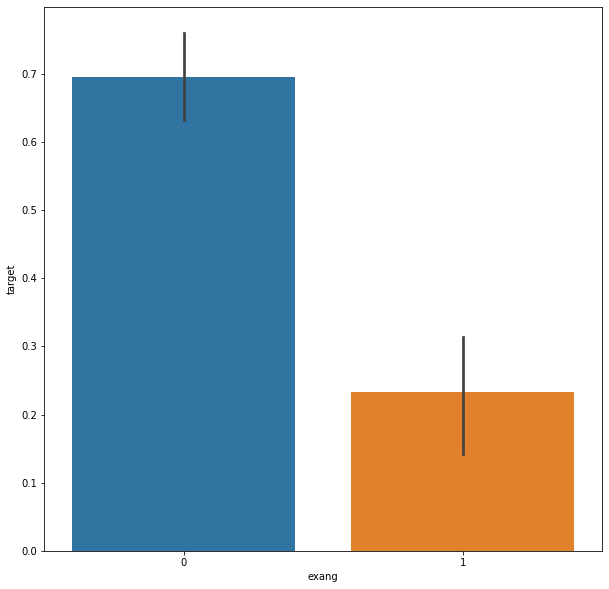

In [22]:
plt.figure(figsize=(10, 10))
sns.barplot(df["exang"],y)


<AxesSubplot:xlabel='slope', ylabel='target'>

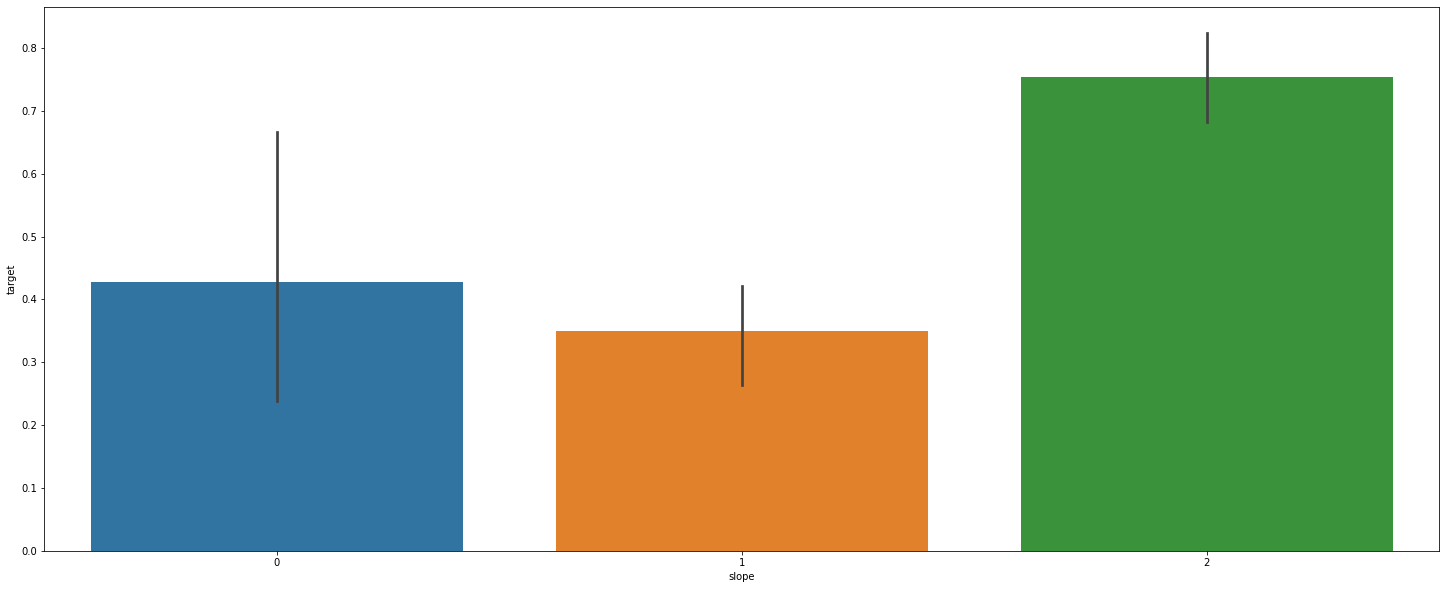

In [23]:
plt.figure(figsize=(25, 10))
sns.barplot(df["slope"],y)


<AxesSubplot:xlabel='ca', ylabel='count'>

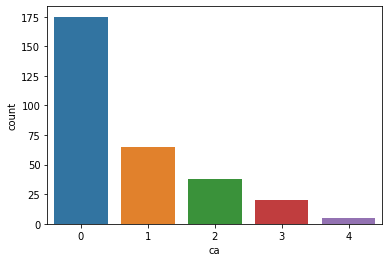

In [25]:
sns.countplot(df["ca"])

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:xlabel='thal', ylabel='Density'>

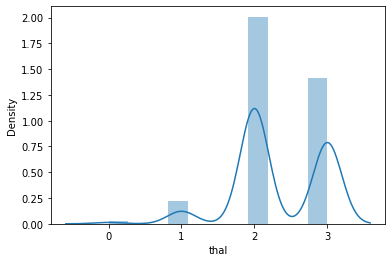

In [26]:

sns.distplot(df["thal"])

<AxesSubplot:xlabel='thal', ylabel='target'>

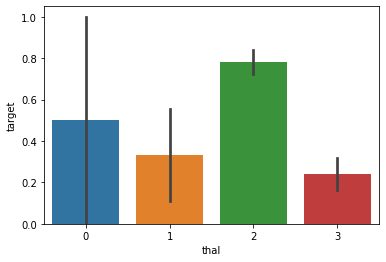

In [27]:
sns.barplot(df["thal"],y)

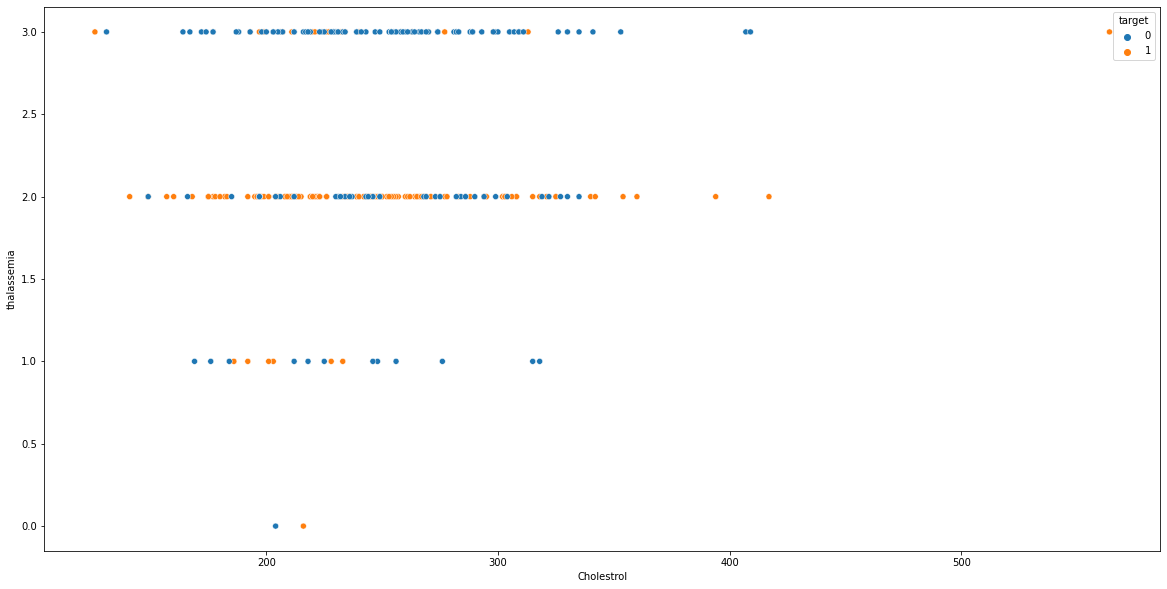

In [31]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='chol',y='thal',data=df,hue='target')
plt.xlabel("Cholestrol")
plt.ylabel("thalassemia")
plt.show()

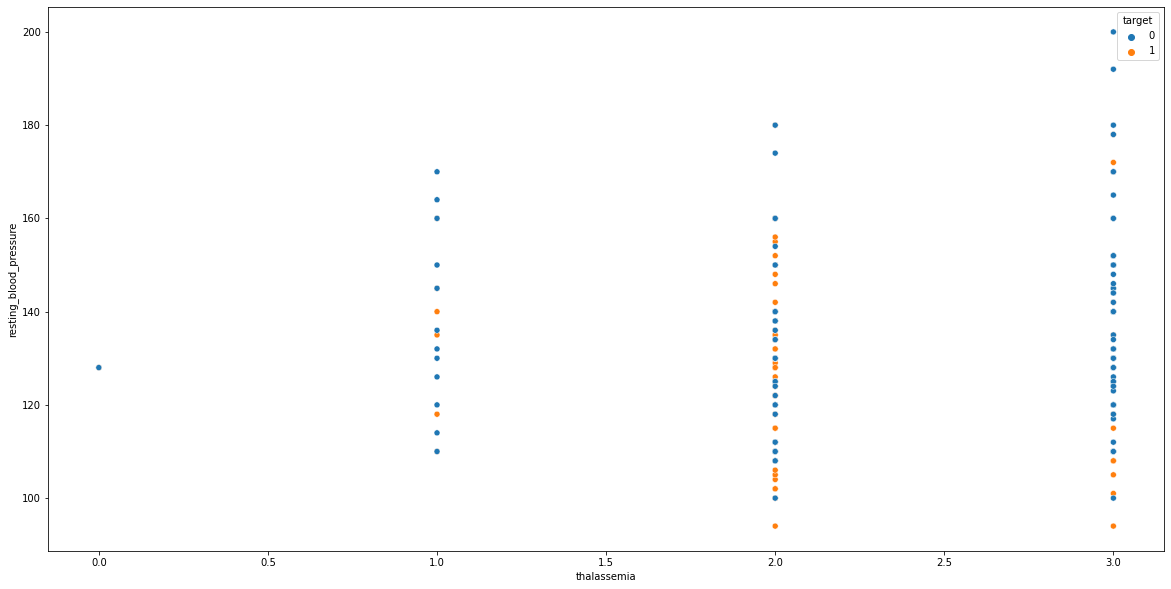

In [34]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thal',y='trestbps',data=df,hue='target')
plt.xlabel("thalassemia")
plt.ylabel("resting_blood_pressure")
plt.show()

In [38]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']
data = df

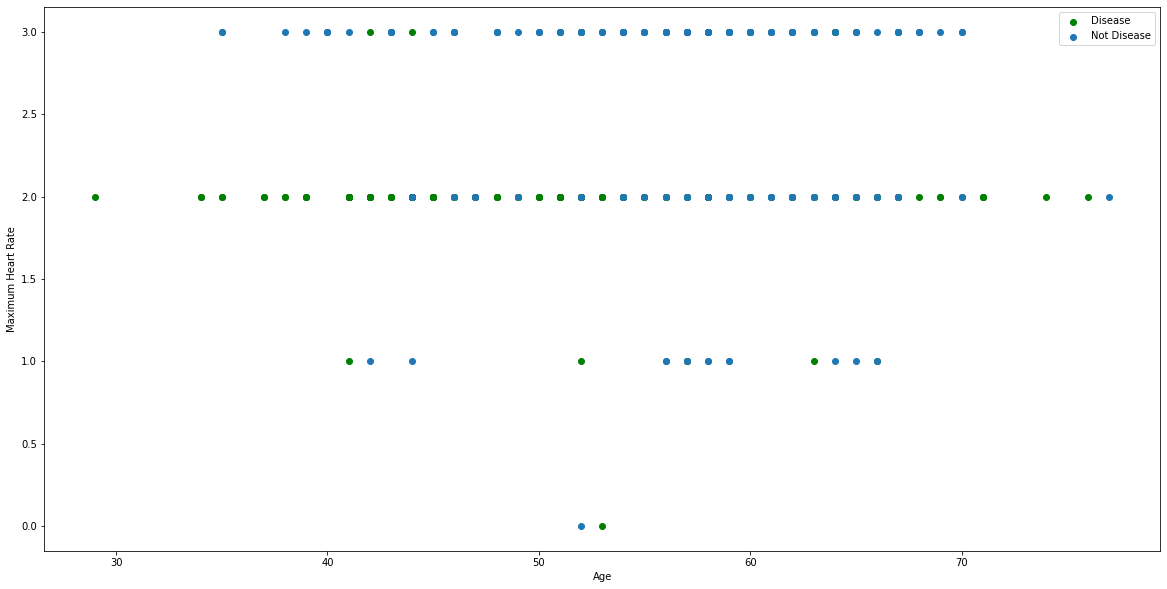

In [39]:

plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

In [40]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

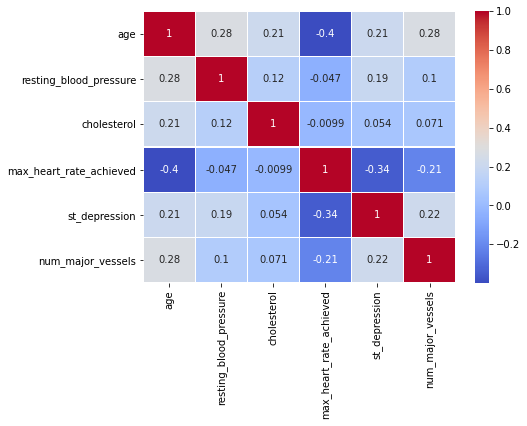

In [42]:
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [43]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,63,145,233,150,2.3,0
1,37,130,250,187,3.5,0
2,41,130,204,172,1.4,0
3,56,120,236,178,0.8,0
4,57,120,354,163,0.6,0
...,...,...,...,...,...,...
298,57,140,241,123,0.2,0
299,45,110,264,132,1.2,0
300,68,144,193,141,3.4,2
301,57,130,131,115,1.2,1


In [46]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train.shape[0], X_test.shape[0]))

Training features have 242 records and Testing features have 61 records.


In [49]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


In [50]:
from sklearn.metrics import accuracy_score

In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, Y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, Y_test)))


Training set score: 0.843
Test set score: 0.852


In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [53]:
Y_pred_lr.shape

(61,)

In [62]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

NameError: name 'accuracy_score' is not defined

In [61]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, Y_test)))

NameError: name 'X_train' is not defined

In [61]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train, Y_train)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train, Y_train)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test, Y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.869


In [60]:

from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
Y_pred_rf.shape

In [60]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [59]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

NameError: name 'X_train' is not defined

In [65]:
Y_pred_nb.shape

(61,)

In [58]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

NameError: name 'accuracy_score' is not defined

In [57]:
# Now using Decision Tree to classify our problem

from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
tree1.fit(X_train,Y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train,Y_train)))
print("Accuracy on training set: {:.3f}".format(tree1.score(X_test,Y_test)))

NameError: name 'X_train' is not defined

In [17]:
out = tree1.predict(X_test)
value = accuracy_score(out,Y_test)
value

NameError: name 'tree1' is not defined